In [ ]:
# Import Modul Untuk Mengelola Upload File
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}"'.format(
      name=fn))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json"


In [ ]:
#Izin File JSON
!chmod 600 /content/kaggle.json

In [ ]:
#Menentukan Direktori Konfigurasi Kaggle
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
#Mendownload Dataset
! kaggle datasets download -d yapwh1208/cats-breed-dataset

cats-breed-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
#Mengekstrak Dataset Dari ZipFile
import zipfile
zip_ref = zipfile.ZipFile('/content/cats-breed-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#Menentukan Base Direktory
base_dir = '/content/cat_v1'

In [ ]:
# Menampilkan Total File
label = {}
total_image = 0
for i in os.listdir(base_dir):
    counting = len(os.listdir(os.path.join(base_dir, i)))
    label[i] = counting
    total_image += counting

print("Total Files : " + str(total_image))

Total Files : 953


In [ ]:
#Mengecek Banyaknya Class Pada Base Dir
print(os.listdir(base_dir))

['maine_coon', 'siamese', 'ragdoll', 'bengal', 'domestic_shorthair']


In [ ]:
#Membuat Labels.txt File
class_names = ['Bengal, Domestic Shorthair ,Maine Coon, Ragdoll, Siamese']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(class_names))

Total Gambar Bengal:  177
Total Gambar Domestic Shorthair:  170
Total Gambar Maine Coon:  191
Total Gambar Ragdoll:  207
Total Gambar Siamese:  208


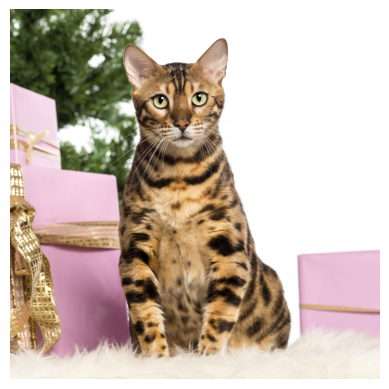

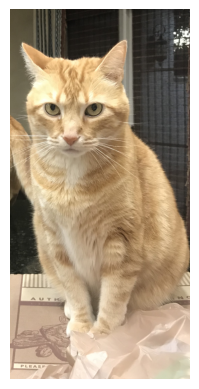

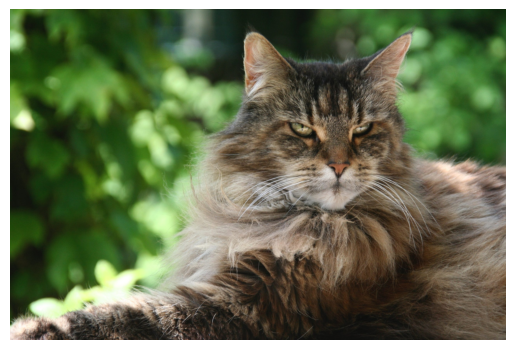

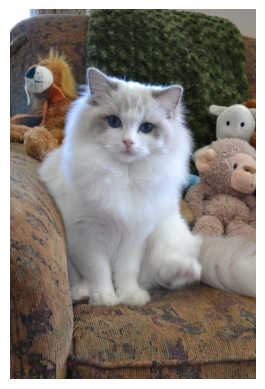

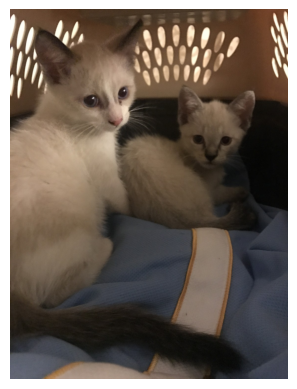

In [ ]:
#Menampilkan Sampel Gambar Kucing disetiap Kelas
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

#Membuat variabel Direktory
bengal_dir = os.path.join(base_dir, 'bengal')
domestic_shorthair_dir = os.path.join(base_dir, 'domestic_shorthair')
maine_coon_dir = os.path.join(base_dir, 'maine_coon')
ragdoll_dir = os.path.join(base_dir, 'ragdoll')
siamese_dir = os.path.join(base_dir, 'siamese')

#Memeriksa Jumlah Dataset Setiap Kelas
print('Total Gambar Bengal: ', len(os.listdir(bengal_dir)))
print('Total Gambar Domestic Shorthair: ', len(os.listdir(domestic_shorthair_dir)))
print('Total Gambar Maine Coon: ', len(os.listdir(maine_coon_dir)))
print('Total Gambar Ragdoll: ', len(os.listdir(ragdoll_dir)))
print('Total Gambar Siamese: ', len(os.listdir(siamese_dir)))

#Menampilkan Contoh Gambar Setiap Kelas
bengal_example = os.path.join(bengal_dir, os.listdir(bengal_dir)[0])
domestic_shorthair_example = os.path.join(domestic_shorthair_dir, os.listdir(domestic_shorthair_dir)[0])
maine_coon_example = os.path.join(maine_coon_dir, os.listdir(maine_coon_dir)[0])
ragdoll_example = os.path.join(ragdoll_dir, os.listdir(ragdoll_dir)[0])
siamese_example = os.path.join(siamese_dir, os.listdir(siamese_dir)[0])

examples = [bengal_example, domestic_shorthair_example, maine_coon_example, ragdoll_example, siamese_example]

for example_path in examples:
    img = mpimg.imread(example_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
#Menggunakan ImageDataGenerator untuk Augmentasi Data
datagenerator = ImageDataGenerator(
    rescale=1./255, #rescaling gambar
    validation_split=0.2, #membagi data training dan validasi
    rotation_range=90, #merotasi gambar
    zoom_range=0.2, #memperbesar gambar 20%
    horizontal_flip=True #augmentasi flip secara horisontal
)

training_generator = datagenerator.flow_from_directory(base_dir,
                                                          target_size=(200,300),
                                                          class_mode='categorical',
                                                          batch_size=32,
                                                          subset='training'
)
validation_generator = datagenerator.flow_from_directory(base_dir,
                                                              target_size=(200,300),
                                                              class_mode='categorical',
                                                              batch_size=32,
                                                              subset='validation'
)

Found 763 images belonging to 5 classes.
Found 188 images belonging to 5 classes.


In [ ]:
from keras.applications import xception

# Membuat Instance Model Xception
xception = xception.Xception(
    include_top=False,
    weights='imagenet',
    input_shape=(200, 300, 3)) #sesuai dengan target size

xception.trainable = False

xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 200, 300, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 99, 149, 32)          864       ['input_10[0][0]']            
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 99, 149, 32)          128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 99, 149, 32)          0         ['block1_conv1_bn[0][0]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import keras

#Input Layers
input = keras.Input(shape=(200, 300, 3))
x = xception(input, training=False)
# Added GlobalAveragePooling2D layer to average spatial output
x = layers.GlobalAveragePooling2D()(x)
#fully connected layer with 64 hidden units and ReLU activation
x = layers.Dense(64, activation='relu')(x)
# Add a dropout rate of 0.2 for to prevent overfitting
x = layers.Dropout(0.2)(x)
# Add a final softmax layer for Classification
output = layers.Dense(5, activation='softmax')(x)

model = keras.Model(input, output)

model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_19 (InputLayer)       [(None, 200, 300, 3)]     0         
                                                                 
 xception (Functional)       (None, 7, 10, 2048)       20861480  
                                                                 
 global_average_pooling2d_5  (None, 2048)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_10 (Dense)            (None, 64)                131136    
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 5)                 325       
                                                           

In [ ]:
#Complie Model ML
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.002),
              loss="categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
history = model.fit(training_generator,
                    validation_data = validation_generator,
                    epochs=10,
                    verbose=1)

Epoch 1/10
24/24 [==============================] - 189s 8s/step - loss: 0.9268 - accuracy: 0.6435 - val_loss: 0.6063 - val_accuracy: 0.7660
Epoch 2/10
24/24 [==============================] - 185s 8s/step - loss: 0.6053 - accuracy: 0.7851 - val_loss: 0.5963 - val_accuracy: 0.7553
Epoch 3/10
24/24 [==============================] - 180s 7s/step - loss: 0.5890 - accuracy: 0.7824 - val_loss: 0.4825 - val_accuracy: 0.8298
Epoch 4/10
24/24 [==============================] - 180s 7s/step - loss: 0.5117 - accuracy: 0.8060 - val_loss: 0.5183 - val_accuracy: 0.7872
Epoch 5/10
24/24 [==============================] - 185s 8s/step - loss: 0.4824 - accuracy: 0.8270 - val_loss: 0.6428 - val_accuracy: 0.7553
Epoch 6/10
24/24 [==============================] - 185s 8s/step - loss: 0.4768 - accuracy: 0.8165 - val_loss: 0.5147 - val_accuracy: 0.8085
Epoch 7/10
24/24 [==============================] - 178s 7s/step - loss: 0.4731 - accuracy: 0.8362 - val_loss: 0.4833 - val_accuracy: 0.8138
Epoch 8/10
24

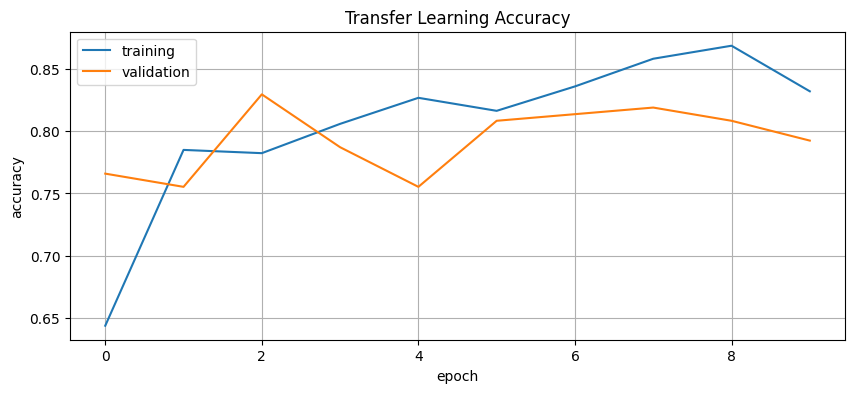

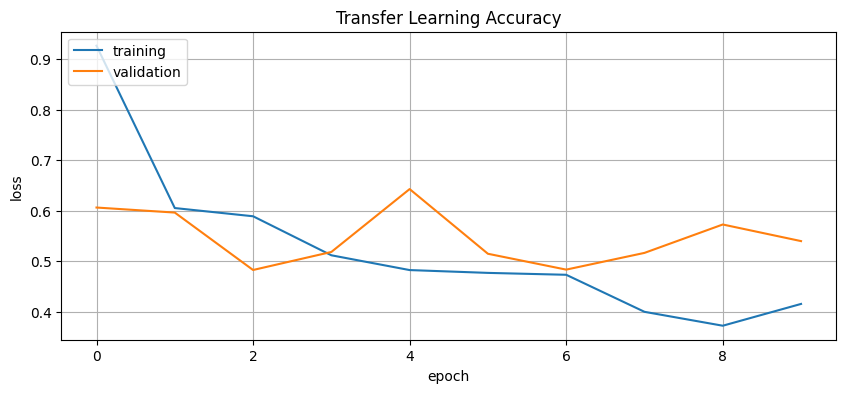

In [ ]:
# Membuat Grafik Akurasi Model Transfer Learning
plt.figure(figsize=(10,4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Transfer Learning Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

print()

# Membuat Grafik Loss Model Transfer Learning
plt.figure(figsize=(10,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Transfer Learning Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
# Menampilkan Daftar Pada Label Gambar
training_generator.class_indices

{'bengal': 0,
 'domestic_shorthair': 1,
 'maine_coon': 2,
 'ragdoll': 3,
 'siamese': 4}

In [ ]:
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

uploaded = files.upload()

for fn in uploaded.keys():

  #Memprediksi Image dengan Model yang Telah dibuat
  path = '/content/' + fn
  img = load_img(path, target_size=(200, 300))
  x = img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  predictions = model.predict(images)
  classes = np.argmax(predictions, axis = 1)

  print(classes)

  print(path)
  if classes==0:
    print('Bengal')
  elif classes==1:
    print('Domestic_Shorthair')
  elif classes==2:
    print('Maine_Coon')
  elif classes==3:
    print('Ragdoll')
  else:
    print('Siamese')

Saving download.jpg to download.jpg
1/1 [==============================] - 1s 1s/step
[0]
/content/download.jpg
Bengal


In [ ]:
#Save Model biar Aman
model.save('Model_meowfinder.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#Mengkonversi H5 Model menjadi TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with tf.io.gfile.GFile('Model_meowfinder.tflite', 'wb') as f:
  f.write(tflite_model)